In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from textwrap import wrap
from matplotlib.patches import Polygon

In [2]:
data = pd.read_csv('education08_1.csv')

In [3]:
data.columns = ['state', 'total_pop', 'child_pop', 'lit_rate', 'enrol_ratio', 'drop_out', 
                'total_teach_pup_ratio', 'up_teach_pup_ratio', 'num_ele_schools', 
                'num_sec_schools', 'total_exp', 'perc_exp', 'per_capita_exp', 'pop_uni',
                'pop_col', 'pop_tech']

In [4]:
data.head()

state  total_pop  child_pop  lit_rate  enrol_ratio  drop_out  \
0      Andhra Padesh       7.62       1.30      60.5        86.99     63.69   
1  Arunachal Pradesh       0.11       0.02      54.3       106.70     70.79   
2              Assam       2.67       0.53      63.3        91.92     74.96   
3              Bihar       8.30       1.88      47.0        65.16     83.06   
4       Chhattisgarh       2.08       0.41      64.7       112.63      0.00   

   total_teach_pup_ratio  up_teach_pup_ratio  num_ele_schools  \
0                     33                  31               99   
1                     34                  30              163   
2                     42                  16              137   
3                    104                  75               57   
4                     48                  46              203   

   num_sec_schools  total_exp  perc_exp  per_capita_exp  pop_uni  pop_col  \
0               22    1806.75      5.09            1387     31.6     0.59   
1               19     187.30      0.53            8179     11.4     1.14   
2               19    1165.14      3.28            2186     46.5     0.88   
3                4    2479.49      6.99            1319     46.2     1.18   
4               12    1439.83      4.06            3513     43.8     1.03   

   pop_tech  
0      1.97  
1      5.70  
2     25.34  
3     43.87  
4     18.25

In [5]:
data_filtered = data.drop(['pop_col', 'pop_uni', 'pop_tech', 'perc_exp', 'enrol_ratio'], axis=1)

In [6]:
data_filtered.head()

state  total_pop  child_pop  lit_rate  drop_out  \
0      Andhra Padesh       7.62       1.30      60.5     63.69   
1  Arunachal Pradesh       0.11       0.02      54.3     70.79   
2              Assam       2.67       0.53      63.3     74.96   
3              Bihar       8.30       1.88      47.0     83.06   
4       Chhattisgarh       2.08       0.41      64.7      0.00   

   total_teach_pup_ratio  up_teach_pup_ratio  num_ele_schools  \
0                     33                  31               99   
1                     34                  30              163   
2                     42                  16              137   
3                    104                  75               57   
4                     48                  46              203   

   num_sec_schools  total_exp  per_capita_exp  
0               22    1806.75            1387  
1               19     187.30            8179  
2               19    1165.14            2186  
3                4    2479.49            1319  
4               12    1439.83            3513

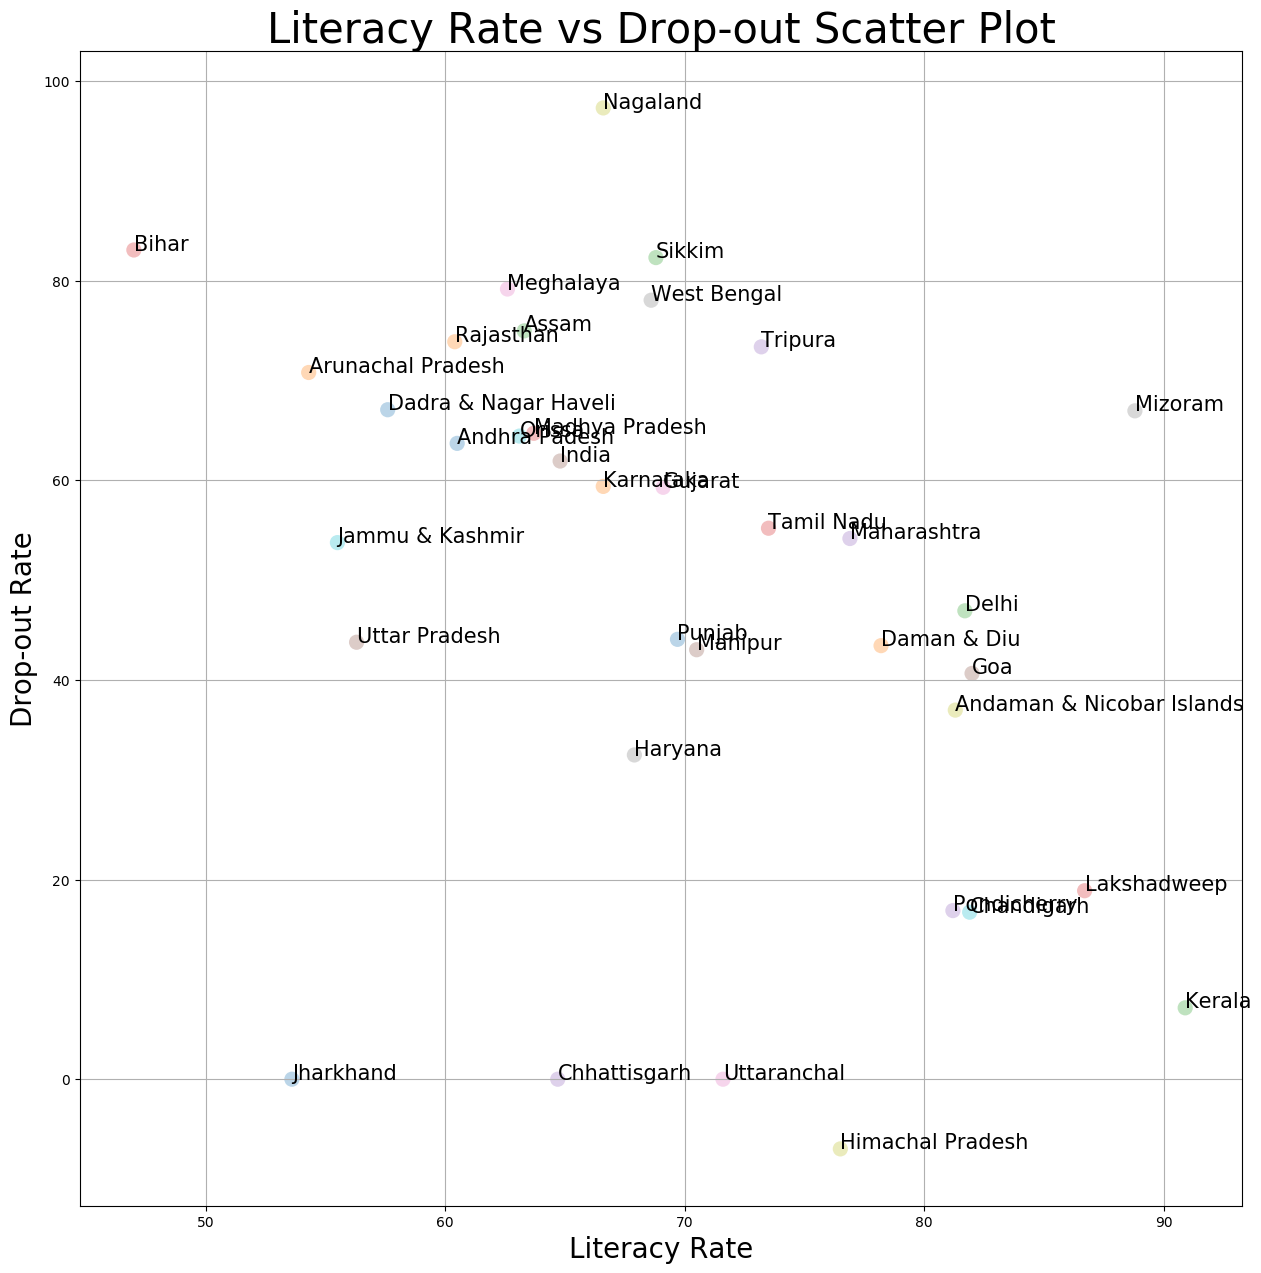

In [20]:
fig, ax = plt.subplots(figsize=(15, 15))
# plt.figure()
for i, state in enumerate(data['state']):
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)
    ax.scatter(data['lit_rate'][i], data['drop_out'][i], s=120, label=state,
               alpha=0.3, edgecolors='none')
    ax.annotate(state, (data['lit_rate'][i], data['drop_out'][i]), fontsize=15)
plt.title('Literacy Rate vs Drop-out Scatter Plot', fontsize=30)
ax.set_ylabel('Drop-out Rate', fontsize=20)
ax.set_xlabel('Literacy Rate', fontsize=20)
# ax.set_xlim(0,100)
# ax.set_ylim(0,100)
# ax.legend()
ax.grid(True)

plt.show()
fig.savefig('scatter_plot.png', dpi=80)

In [ ]:
# Observation 1
# Literacy rate of Kerala is highest and drop out rate is fifth lowest
# Literacy rate of Bihar is lowest and it has the most drop out rate second to Nagaland
# Observing the trends, it may be concluded that high drop-out is directly proportional to low literacy rate
# Jharkhand seems to be an outlier as it has both low drop-out rate and literacy rate which indicates the problem of low literacy there is associated with other factors than drop-out 
# Mizoram has the 2nd highest literacy rate but a high drop-out rate as well which makes it an outlier too and indicates that people even after dropping out are still educated

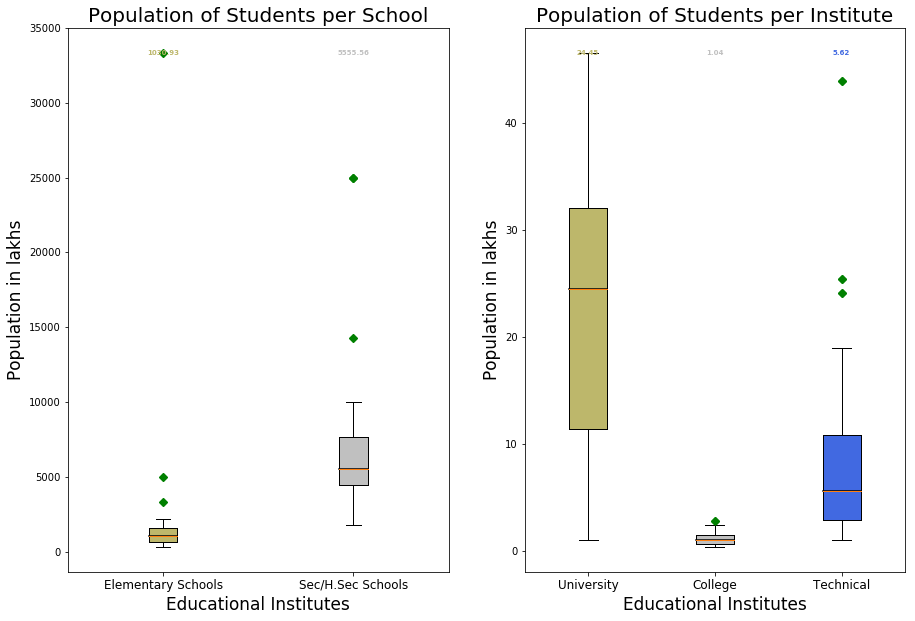

In [14]:
box_plot_data = data.dropna()

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
# fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

box_labels = ['Elementary Schools', 'Sec/H.Sec Schools']

# fig, ax = plt.subplots(figsize=(15, 15))

box_plot_data_np = np.stack([100000./box_plot_data['num_ele_schools'], 100000./box_plot_data['num_sec_schools']], 1)
colours1 = ['darkkhaki', 'silver']
medians = np.empty(2)
for i in range(2):
    bp = axs[0].boxplot(box_plot_data_np, 0, 'gD')
#     print (bp)
    box  = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    axs[0].add_patch(Polygon(box_coords, facecolor=colours1[i]))
    
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        axs[0].plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    
pos = np.arange(2) + 1
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(2), axs[0].get_xticklabels()):
    k = tick
    axs[0].text(pos[tick], .95, upper_labels[tick],
             transform=axs[0].get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[0], color=colours1[k])

# ax1.set_ylim(bottom, top)
axs[0].set_xticklabels(box_labels, rotation=0, fontsize=12)
axs[0].set_xlabel('Educational Institutes', fontsize=17)
axs[0].set_ylabel('Population in lakhs', fontsize=17)
axs[0].set_title('Population of Students per School', fontsize=20)


box_labels = ['University', 'College', 'Technical']
box_plot_data_np = np.stack([box_plot_data['pop_uni'], box_plot_data['pop_col'], box_plot_data['pop_tech']], 1)
colours2 = ['darkkhaki', 'silver', 'royalblue']
medians = np.empty(3)
for i in range(3):
    bp = axs[1].boxplot(box_plot_data_np, 0, 'gD')
    box  = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    axs[1].add_patch(Polygon(box_coords, facecolor=colours2[i]))

    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        axs[1].plot(medianX, medianY, 'k')
    medians[i] = medianY[0]

pos = np.arange(3) + 1
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(3), axs[1].get_xticklabels()):
    k = tick
    axs[1].text(pos[tick], .95, upper_labels[tick],
             transform=axs[1].get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[0], color=colours2[k])
# ax1.set_ylim(bottom, top)
axs[1].set_xticklabels(box_labels, rotation=0, fontsize=12)
axs[1].set_xlabel('Educational Institutes', fontsize=17)
axs[1].set_ylabel('Population in lakhs', fontsize=17)
axs[1].set_title('Population of Students per Institute', fontsize=20)

# plt.title('Population of Students per Institute', fontsize=20)

plt.show()
fig.savefig('box_plot.png', dpi=80)

In [ ]:
# Observation
# The medians are written in bold at the top of each box plot
# It can be observed that population of students per school is much more than any of the 3 institutes
# There are more number of students per Secondary/Higher Secondary school than per Elementary school
# Among the 3 institutes - University, College and Technical, each College experiences the lowest populations of students than University and Technical.
# Per University, number of students is the most.
# The outlier state (Chandigarh) in Elementary schools has the most number of students per educational institute across all categories.

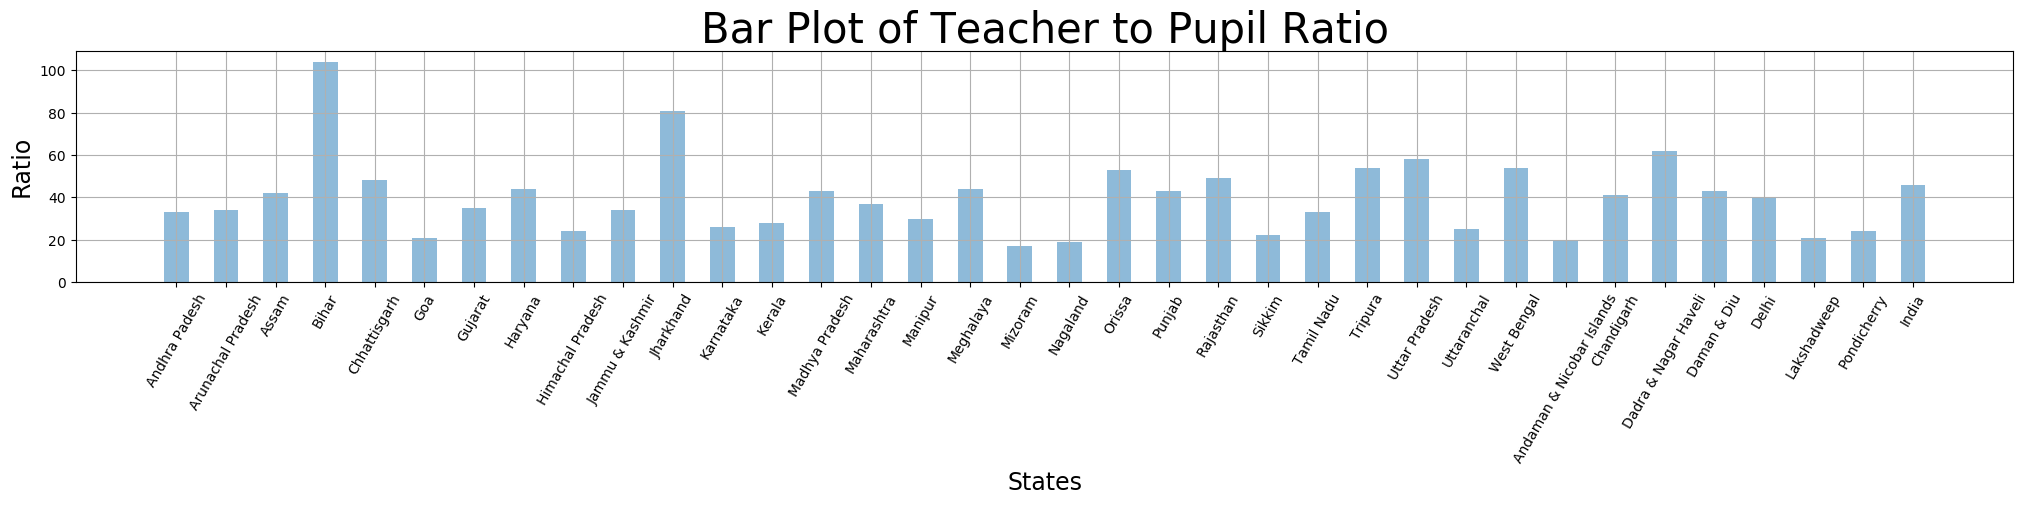

In [19]:
# objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(data['total_teach_pup_ratio'].shape[0])
# performance = [10,8,6,4,2,1]
fig, ax = plt.subplots(figsize=(25, 3))
plt.bar(y_pos, data['total_teach_pup_ratio'], align='center', alpha=0.5, width = 0.5)
plt.xticks(y_pos, data['state'], rotation=60)
plt.xlabel('States', fontsize=17)
plt.ylabel('Ratio', fontsize=17)
plt.title('Bar Plot of Teacher to Pupil Ratio', fontsize=30)
ax.grid(True)
plt.show()
fig.savefig('bar_plot.jpg', dpi=80)

In [ ]:
# Observation 3
# We can observe from the bar plot that Bihar has the highest teacher to pupil ratio
# This implies that for each teacher there are more number of students in Bihar than any other state in India
# Also, Mizoram has the lowest ratio implying it has the least number of students per teacher